In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd, numpy as np

from IPython.display import display
from IPython.display import Image

In [3]:
#Charge le dataset mortality
mortality_df = pd.read_csv('mortality_clean_aggregate.csv')
mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141962 entries, 0 to 141961
Data columns (total 4 columns):
type    141962 non-null object
area    141962 non-null object
year    141962 non-null int64
sum     141962 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [4]:
#Ne garde que les lignes avec les pays en développement
developping_areas=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Fiji', 'Gabon', 'The Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Federated States of Micronesia', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'São Tomé and Príncipe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe', 'Cuba', 'Nauru', 'North Korea']
col_names = list(mortality_df.columns.values)
mortality_dev_df=mortality_df[mortality_df.area.isin(developping_areas)]
all_dev_areas=mortality_dev_df.area.unique()
all_areas=mortality_df.area.unique()
print("Il reste {0} pays sur {1}".format(len(all_dev_areas), len(all_areas)))

Il reste 75 pays sur 153


In [5]:
#Il n'y a pas de valeurs manquantes dans mortality sur les pays en developpement
col_names = list(mortality_dev_df.columns.values)
missing_values=[]
for col_name in col_names:
    col = mortality_dev_df[col_name]
    nb_nan = col.isnull().sum()
    missing_values+=[nb_nan]
missing_values

[0, 0, 0, 0]

In [6]:
#Ne garde que les lignes du cancer du colon (on perd le Pakistan)
mortality_dev_colon_df=mortality_dev_df[mortality_dev_df.type == 'C18']

In [7]:
#Charge le dataset fao
fao_df = pd.read_csv('FAO.csv')
fao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16756 entries, 0 to 16755
Columns: 4625 entries, area to 6717..5110
dtypes: float64(4623), int64(1), object(1)
memory usage: 591.3+ MB


In [8]:
#Ne garde que les lignes avec les pays en développement
developping_areas=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Costa Rica', 'Croatia', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Fiji', 'Gabon', 'The Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Federated States of Micronesia', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'São Tomé and Príncipe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe', 'Cuba', 'Nauru', 'North Korea']
fao_dev_df=fao_df[fao_df.area.isin(developping_areas)]
all_dev_areas=fao_dev_df.area.unique()
all_areas=fao_df.area.unique()
print("Il reste {0} pays sur {1}".format(len(all_dev_areas), len(all_areas)))

Il reste 136 pays sur 337


In [9]:
#Ne garde que les colonnes avec plus de 50% de données
col_names = list(fao_dev_df.columns.values)
keep_col_list=[]

for col_name in col_names:
        col = fao_dev_df[col_name]
        nb_nan = col.isnull().sum()
        if (float(nb_nan) / len(col)) <= 0.5 :
            keep_col_list+=[col_name]
fao_dev_clean_df = fao_dev_df[keep_col_list]

In [10]:
#Inner join des deux datasets
df=pd.merge(mortality_dev_colon_df, fao_dev_clean_df, on=['area', 'year'], how='inner')

In [11]:
#Infos sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 1524
Columns: 2500 entries, type to 6690..5110
dtypes: float64(2497), int64(1), object(2)
memory usage: 29.1+ MB


In [12]:
#PCA 
from sklearn.decomposition import PCA        # The main algorithm
from matplotlib import pyplot as plt         # Graphing
from collections import defaultdict, Counter # Utils
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [13]:
limit=10000
df = df[:limit]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 1524
Columns: 2500 entries, type to 6690..5110
dtypes: float64(2497), int64(1), object(2)
memory usage: 29.1+ MB


In [14]:
df = df.drop('type', axis=1)
mortality_col=df['sum']
df = df.drop('sum', axis=1)
df = df.drop('year', axis=1)
df = df.drop('area', axis=1)

In [16]:
# Get the column names
#categorical_columns = ['year', 'area']
#df[categorical_columns] = df[categorical_columns].astype(str) 
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)

# Print a quick summary of what we just loaded
#print ("Loaded dataset")
#print ("Rows: %s" % df.shape[0])
#print ("Columns: %s (%s num, %s cat)" % (df.shape[1], 

#len(numerical_columns), len(categorical_columns)))
#print ("Categorical columns %s " % categorical_columns)

In [17]:
# Use mean for numerical features
for feature in numerical_columns:
    v = df[feature].mean()
    if np.isnan(v):
        v = 0
    print ("Filling %s with %s" % (feature, v))
    df[feature] = df[feature].fillna(v)
    
# Use mode for categorical features
#for feature in categorical_columns:
#    v = df[feature].value_counts().index[0]
#    df[feature] = df[feature].fillna(v)

Filling 1012..5322 with 1275200.89273
Filling 1012..5417 with 164.271124173
Filling 1012..5510 with 19407.1080088
Filling 1016..5111 with 956327.396081
Filling 1017..5320 with 361202.858578
Filling 1017..5417 with 134.936270653
Filling 1017..5510 with 4985.79307632
Filling 1025..5320 with 381239.565471
Filling 1025..5420 with 32.8140116764
Filling 1025..5510 with 1246.3352794
Filling 1032..5322 with 370391.277276
Filling 1032..5417 with 159.267768595
Filling 1032..5510 with 5005.65206612
Filling 1034..5111 with 2871640.36594
Filling 1035..5320 with 2858605.97174
Filling 1035..5417 with 653.164731495
Filling 1035..5510 with 218793.617391
Filling 1055..5322 with 2844335.30838
Filling 1055..5417 with 651.576951673
Filling 1055..5510 with 218018.809206
Filling 1057..5112 with 53143.4532325
Filling 1058..5321 with 171644.305365
Filling 1058..5424 with 13286.1918845
Filling 1058..5510 with 255167.958735
Filling 1062..5313 with 17851.931084
Filling 1062..5410 with 93055.7537688
Filling 1062..

Filling 2549..5910 with 6007.01024765
Filling 2551..5141 with 15403.5058737
Filling 2551..5300 with 15524.7077827
Filling 2551..5510 with 28642.0690827
Filling 2551..5610 with 4618.7428356
Filling 2551..5910 with 8066.54062751
Filling 2555..5141 with 13194.6658879
Filling 2555..5300 with 684568.948851
Filling 2555..5610 with 133012.925843
Filling 2555..5910 with 327712.708411
Filling 2556..5120 with 1272.80354505
Filling 2556..5141 with 9260.5727003
Filling 2556..5300 with 17429.9621942
Filling 2556..5510 with 24389.8681319
Filling 2556..5525 with 1234.35479632
Filling 2556..5610 with 4749.70486891
Filling 2556..5910 with 4716.69361702
Filling 2557..5300 with 201336.566255
Filling 2557..5610 with 12203.0337449
Filling 2558..5141 with 446.668759812
Filling 2558..5300 with 51946.3553531
Filling 2558..5610 with 18855.467383
Filling 2559..5130 with 137377.407895
Filling 2559..5300 with 135286.43907
Filling 2559..5510 with 175835.679551
Filling 2559..5525 with 8842.62225097
Filling 2559..56

Filling 2737..5510 with 59043.1124088
Filling 2737..5610 with 22863.250556
Filling 2737..5910 with 6922.15803336
Filling 2738..5071 with 174.183157895
Filling 2738..5120 with 74308.1984877
Filling 2738..5130 with 944620.627202
Filling 2738..5141 with 1272982.3523
Filling 2738..5300 with 2190891.3698
Filling 2738..5510 with 2198037.64565
Filling 2738..5610 with 89837.8242159
Filling 2738..5910 with 36299.5528331
Filling 2739..5141 with 160432.009482
Filling 2739..5300 with 406004.791393
Filling 2739..5510 with 481922.537856
Filling 2739..5610 with 99952.2042305
Filling 2739..5910 with 55342.0542027
Filling 2740..5141 with 18439.8935084
Filling 2740..5300 with 18720.702407
Filling 2740..5610 with 4092.97447119
Filling 2740..5910 with 1835.72981615
Filling 2741..5141 with 44570.1283735
Filling 2741..5300 with 44739.2173596
Filling 2741..5610 with 4739.10211524
Filling 2741..5910 with 5519.2004662
Filling 2742..5300 with 297356.420267
Filling 2742..5520 with 295886.460993
Filling 2742..561

Filling 2913..5071 with -9953.57111275
Filling 2913..5120 with 26532.0625
Filling 2913..5130 with 1164618.95753
Filling 2913..5141 with 110205.698295
Filling 2913..5153 with 72251.3978405
Filling 2913..5300 with 1411370.78775
Filling 2913..5510 with 1575289.68444
Filling 2913..5520 with 58320.3265823
Filling 2913..5525 with 36261.044287
Filling 2913..5610 with 190934.299481
Filling 2913..5910 with 339639.353027
Filling 2914..5071 with -633.783467447
Filling 2914..5141 with 178498.280088
Filling 2914..5153 with 94929.6827133
Filling 2914..5300 with 273096.015317
Filling 2914..5510 with 422131.110119
Filling 2914..5610 with 100739.110139
Filling 2914..5910 with 245119.936154
Filling 2918..5071 with 452.372841444
Filling 2918..5120 with 141320.648432
Filling 2918..5141 with 1334755.64333
Filling 2918..5300 with 1556390.74982
Filling 2918..5510 with 1657764.47921
Filling 2918..5610 with 73754.571116
Filling 2918..5910 with 175676.80438
Filling 2919..5071 with -1392.63962559
Filling 2919..5

Filling 2533..645 with 3.12888157895
Filling 2533..646 with 8.57242598684
Filling 2533..664 with 7.90131578947
Filling 2533..674 with 0.108698770492
Filling 2533..684 with 0.0273176470588
Filling 2534..641 with 22035.2963049
Filling 2534..645 with 4.91468475658
Filling 2534..646 with 13.464820431
Filling 2534..664 with 12.1630695444
Filling 2534..674 with 0.280043715847
Filling 2534..684 with 0.0460978520286
Filling 2542..641 with 600179.454004
Filling 2542..645 with 34.7217213713
Filling 2542..646 with 95.1284536834
Filling 2542..664 with 339.029175784
Filling 2543..641 with 21755.5640773
Filling 2543..645 with 1.99700948213
Filling 2543..646 with 5.47161925602
Filling 2543..664 with 12.1159737418
Filling 2546..641 with 104201.455109
Filling 2546..645 with 3.69603378922
Filling 2546..646 with 10.1263395012
Filling 2546..664 with 34.2992759453
Filling 2546..674 with 2.18747181965
Filling 2546..684 with 0.161966156326
Filling 2547..641 with 10562.8962918
Filling 2547..645 with 0.9985167

Filling 2820..684 with 0.751120178042
Filling 2827..641 with 656663.223392
Filling 2827..645 with 37.7528154632
Filling 2827..646 with 103.432268417
Filling 2827..664 with 360.994894238
Filling 2848..641 with 1802305.74733
Filling 2848..645 with 115.276593727
Filling 2848..646 with 315.825966448
Filling 2848..664 with 186.00948213
Filling 2848..674 with 10.5848067104
Filling 2848..684 with 9.74572574763
Filling 2899..664 with 4.33033707865
Filling 2899..674 with 0.129969348659
Filling 2899..684 with 0.0551153846154
Filling 2905..641 with 2501109.84589
Filling 2905..646 with 363.53321663
Filling 2907..641 with 950251.358972
Filling 2907..646 with 143.810299052
Filling 2909..641 with 660147.72453
Filling 2909..646 with 103.997789934
Filling 2911..641 with 133908.025649
Filling 2911..646 with 17.4311786509
Filling 2912..641 with 15403.4712702
Filling 2912..646 with 2.58350954479
Filling 2913..641 with 110205.684344
Filling 2913..646 with 21.5881467754
Filling 2914..641 with 178498.244369


Filling 1054..72350 with 82.7354762036
Filling 1054..72351 with 66.9354013067
Filling 1054..72356 with 33.4571756534
Filling 1054..72360 with 0.0567137551582
Filling 1054..723601 with 0.026689133425
Filling 1054..723602 with 0.0300252407153
Filling 1054..72361 with 0.0917659559835
Filling 1054..72366 with 0.000209628610729
Filling 1054..72370 with 17.5812883081
Filling 1054..72371 with 28.4475462861
Filling 1054..72376 with 0.0649004126547
Filling 1054..72380 with 8491911.03032
Filling 1054..723801 with 1698382.20606
Filling 1054..723802 with 2547573.3091
Filling 1054..72381 with 13740404.9951
Filling 1054..72386 with 13765809.5648
Filling 1054..72436 with 33.5220762724
Filling 1054..72446 with 53.1176821871
Filling 1096..72244 with 18.0
Filling 1096..72246 with 1.67434523265
Filling 1096..72254 with 10.1387382151
Filling 1096..72256 with 0.897378184592
Filling 1096..72290 with 0.0142970251716
Filling 1096..72291 with 0.0142991624791
Filling 1096..72296 with 0.00485762144054
Filling 10

Filling 961..72311 with 108.345529135
Filling 961..72314 with 6832.84084478
Filling 961..72316 with 271.561277163
Filling 961..72340 with 6.89053730104
Filling 961..72341 with 0.245262975779
Filling 961..72346 with 0.288282698962
Filling 961..72350 with 2136.06681869
Filling 961..72351 with 76.0319504498
Filling 961..72356 with 89.3682239446
Filling 961..72360 with 1.46423882353
Filling 961..723601 with 0.689053217993
Filling 961..723602 with 0.775184844291
Filling 961..72361 with 0.10423384083
Filling 961..72366 with 0.0756796539792
Filling 961..72370 with 453.914200069
Filling 961..72371 with 32.3135787543
Filling 961..72376 with 23.461335917
Filling 961..72380 with 219244394.677
Filling 961..723801 with 43848878.9354
Filling 961..723802 with 65773318.403
Filling 961..72381 with 15607731.8377
Filling 961..72386 with 20754582.8023
Filling 961..72436 with 112.829557647
Filling 961..72446 with 158.731720138
Filling 976..72244 with 5.51146131805
Filling 976..72246 with 0.162189398281
Fil

In [18]:
#Rescaling the whole data
X = df.values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X)
X_std = ss.transform(X)

In [19]:
#Fit
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [20]:
VARIANCE_TO_KEEP = 0.9

In [21]:
#plt.bar(range(sklearn_pca.n_components_), sklearn_pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
#plt.step(range(sklearn_pca.n_components_), [sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)], alpha=0.5, where='mid',label='cumulative explained variance')
#plt.axhline(y=0.95, linewidth=2, color = 'r')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#plt.xlim([0, sklearn_pca.n_components_])
#plt.legend(loc='best')
#plt.tight_layout()

keep_recommend = [sklearn_pca.explained_variance_ratio_[:y].sum()>VARIANCE_TO_KEEP for y in range(1,sklearn_pca.n_components_+1)].count(False)
print ("Number of components to keep to retain %s%% of the variance:" % (100*VARIANCE_TO_KEEP), keep_recommend, "out of the original", sklearn_pca.n_components_)

Number of components to keep to retain 90.0% of the variance: 83 out of the original 2496


In [22]:
#Retain only the recommended components
retained_components_number = keep_recommend

In [23]:
# Final Fit 
sklearn_pca_final = PCA(n_components=retained_components_number)
Y_sklearn_final = sklearn_pca_final.fit_transform(X_std)

In [24]:
df_PCA = pd.DataFrame(Y_sklearn_final, columns=[("PCA_component_" + str(comp)) for comp in range(sklearn_pca_final.n_components)])

df_PCA.insert(0, 'mortality', mortality_col)

In [25]:
df_PCA

,mortality,PCA_component_0,PCA_component_1,PCA_component_2,PCA_component_3,PCA_component_4,PCA_component_5,PCA_component_6,PCA_component_7,PCA_component_8,...,PCA_component_73,PCA_component_74,PCA_component_75,PCA_component_76,PCA_component_77,PCA_component_78,PCA_component_79,PCA_component_80,PCA_component_81,PCA_component_82
0,37.0,-12.065469,3.692317,-3.969277,4.342690,7.949724,-3.773233,-0.504023,-8.970031,1.525425,...,0.108301,-0.511172,0.293257,0.546726,-0.945648,-0.627811,0.823240,-1.349658,-0.046302,0.575554
1,56.0,-11.696437,4.898029,-3.672072,4.593145,8.254148,-0.072812,-3.034747,-10.571659,-0.117629,...,0.003118,-0.745284,-2.355053,-0.216177,-0.478367,-0.529627,2.058081,-1.392529,-1.006274,0.851715
2,61.0,-10.984807,7.851046,-2.461674,6.377422,9.516381,6.976332,-5.526693,-13.405411,-3.798615,...,-0.842057,0.053384,-6.446457,1.283792,1.079938,-0.661048,3.238547,-0.318576,-2.185866,2.353439
3,3154.0,26.430410,6.498743,-18.281708,13.024460,15.752805,0.863744,-26.547618,37.338283,2.585627,...,2.348038,1.220048,0.684121,3.097796,-1.129274,-0.880317,-0.488997,-0.035658,-1.051458,-0.664100
4,3687.0,26.514483,6.677406,-14.146785,10.308757,11.335869,5.944509,-23.220132,32.074549,4.860312,...,0.097637,-1.192302,-1.545566,-0.495335,0.823594,1.307339,-0.872841,1.436837,-1.117746,-0.154829
5,178.0,-13.655961,-1.666313,-3.914503,1.435178,6.783754,-4.692773,3.465603,-4.383993,5.688704,...,-0.267343,-1.503084,-1.137016,0.045393,-0.739123,0.756748,-0.451974,0.496755,-1.339532,0.640733
6,205.0,-13.762570,-2.130693,-4.116541,1.000294,4.752465,-4.071714,2.806331,-3.609097,5.149075,...,0.531110,-1.018240,-1.035816,-0.101809,-0.364733,0.034275,-1.460021,0.688804,-0.599771,-0.297129
7,444.0,-12.192888,4.146244,-2.561109,3.980463,4.559759,5.263972,-2.884548,-8.522261,0.337578,...,1.461226,-2.026218,-3.577468,2.525530,1.197592,-0.728107,1.798227,1.262519,-0.876198,0.148635
8,212.0,-0.031982,-0.012308,-0.010085,-0.021750,-0.094752,0.114744,0.003778,0.065989,-0.224003,...,-0.000829,-0.186511,-0.040421,0.039479,0.014584,0.009995,-0.107999,-0.118910,-0.261821,0.121140
9,159.0,-11.968834,-1.367400,-3.295021,3.460906,8.516217,-3.891183,4.355972,-4.524832,4.816369,...,-0.950111,-1.191094,-0.853616,-3.915291,0.233144,-0.252919,-0.641181,3.313250,1.765954,2.130014


In [26]:
#Linear Regression
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import sklearn.cross_validation
from sklearn.linear_model import LinearRegression

In [27]:
X=df_PCA.drop('mortality', axis=1)

lm=LinearRegression()
lm.fit(X, df_PCA.mortality)
print("Estimated intercept coefficient : {}".format(lm.intercept_))
print("Number of coefficients : {}".format(len(lm.coef_)))

Estimated intercept coefficient : 835.495737704918
Number of coefficients : 83


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [28]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,PCA_component_0,42.182258
1,PCA_component_1,49.723573
2,PCA_component_2,4.035795
3,PCA_component_3,-20.963396
4,PCA_component_4,-4.027165
5,PCA_component_5,28.629749
6,PCA_component_6,-13.658627
7,PCA_component_7,26.457434
8,PCA_component_8,42.590665
9,PCA_component_9,40.405784


In [29]:
lm.predict(X)[0:5]

array([   43.78539991,     4.59976169,   283.68620044,  3337.09735088,
        3771.36899317])

Text(0,0.5,'Prediction')

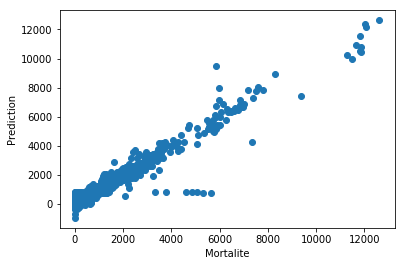

In [30]:
plt.scatter(df_PCA.mortality, lm.predict(X))
plt.xlabel("Mortalite")
plt.ylabel("Prediction")

In [31]:
mean_square_error = np.mean((df_PCA.mortality - lm.predict(X)) **2)
print("Mean Square Error : {}".format(mean_square_error))

Mean Square Error : 160928.65755055766


In [32]:
#Avec des sets train et tests
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, df_PCA.mortality, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1021, 83)
(504, 83)
(1021,)
(504,)


In [33]:
lm2=LinearRegression()
lm2.fit(X_train, Y_train)
pred_train=lm2.predict(X_train)
pred_test=lm2.predict(X_test)

In [34]:
mse_train = np.mean((Y_train - lm.predict(X_train)) **2)
mse_test = np.mean((Y_test - lm.predict(X_test)) **2)
print("MS Error on train set : {}".format(mse_train))
print("MS Error on test set : {}".format(mse_test))

MS Error on train set : 171063.2990103364
MS Error on test set : 140397.96522826786


In [35]:
#Regression Ridge
from sklearn import linear_model

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [36]:
#Calcul des erreurs pour différentes valeurs de l'hyperparamètre
coefs = []
errors = []
ridge=linear_model.Ridge()
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - Y_test) ** 2))

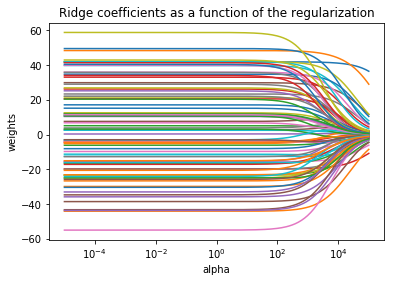

In [37]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

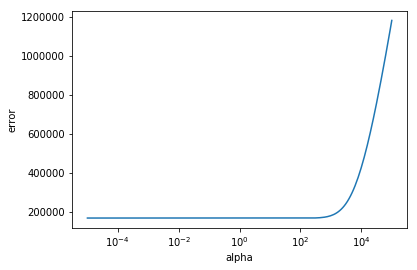

In [38]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [39]:
print("Erreur minimale avec un ridge :{}".format(min(errors)))

Erreur minimale avec un ridge :166189.89625224454


In [40]:
#Lasso regression (met certains coeffs à zéro)
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - Y_test) ** 2))

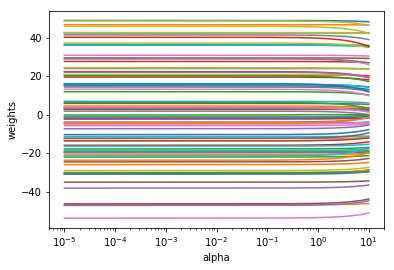

In [41]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

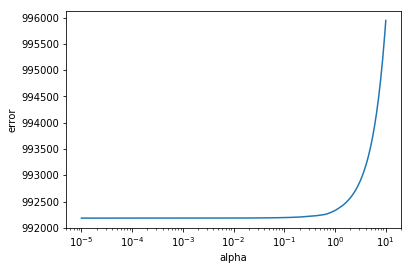

In [42]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [43]:
print("Erreur minimale avec un lasso :{}".format(min(errors)))

Erreur minimale avec un lasso :992185.0452713339
